# Binomial Tree European Equity Option
##### convergence of a binomial tree using the european equity options we used for the Black-Scholes and Heston models.

In [ ]:
from QuantLib import *
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
maturity_date = Date(15, 1, 2018)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate =  0.0163
option_type = Option.Call
risk_free_rate = 0.001
day_count = Actual365Fixed()
calendar = UnitedStates()
calculation_date = Date(8, 5, 2016)
Settings.instance().evaluationDate = calculation_date

In [110]:
payoff = PlainVanillaPayoff(option_type, strike_price)
exercise = EuropeanExercise(maturity_date)
european_option = VanillaOption(payoff, exercise)

In [111]:
spot_handle = QuoteHandle(SimpleQuote(spot_price))
flat_ts = YieldTermStructureHandle(FlatForward(calculation_date, risk_free_rate,day_count))
dividend_yield = YieldTermStructureHandle(FlatForward(calculation_date, dividend_rate, day_count))
flat_vol_ts = BlackVolTermStructureHandle(BlackConstantVol(calculation_date, calendar, volatility, day_count))
bsm_process = BlackScholesMertonProcess(spot_handle,dividend_yield, flat_ts, flat_vol_ts)

In [112]:
european_option.setPricingEngine(AnalyticEuropeanEngine(bsm_process)) 
bs_price = european_option.NPV()

##### Computing Binomial-tree model

In [113]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = BinomialVanillaEngine(bsm_process, "crr", steps) 
    option.setPricingEngine(binomial_engine)
    return option.NPV()

In [114]:
steps = range(2, 200, 1)
prices = [binomial_price(european_option, bsm_process, step) for step in steps]

##### Convergence of the binomial-tree approach by comparing price and BSM price

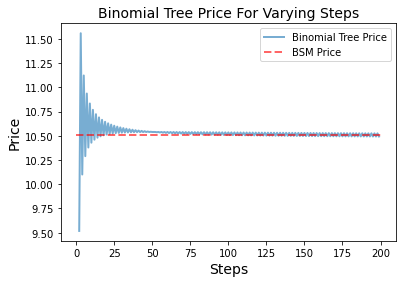

In [115]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,200],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps", size=14)
plt.ylabel("Price", size=14)
plt.title("Binomial Tree Price For Varying Steps", size=14)
plt.legend()